In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import random

import os
import sys
sys.path.append('../src')

from math_utils import *
from model import *
from utils import *

SEED = 42
np.random.seed(SEED)
random.seed(SEED)

In [3]:
plt.rcParams.update({'font.size': 14, 'axes.labelsize': 14})
plt.rcParams.update({'figure.figsize': (10, 6)})

# QR

## Complexity Analysis

Show that our implementation scale linearly in "m"

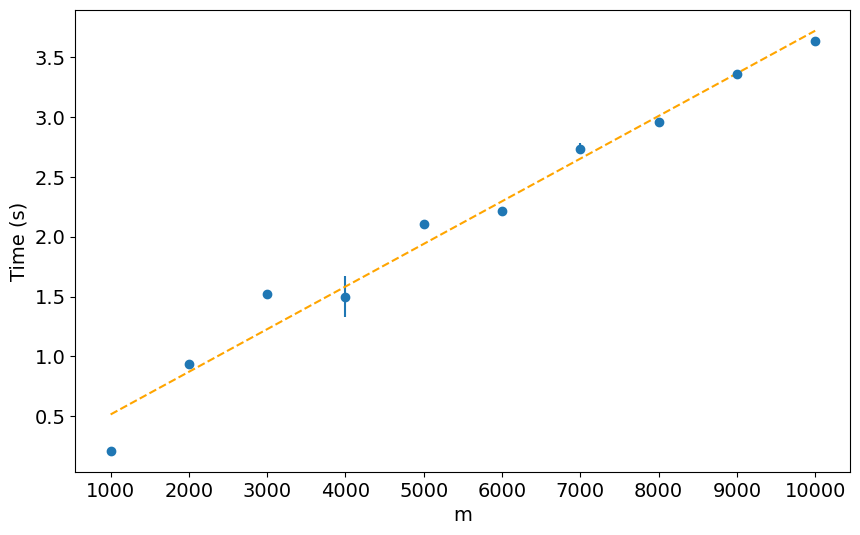

In [3]:
plot_time_mean_variance(n=256, trials=3, START=1000, END=10001, STEP=1000)

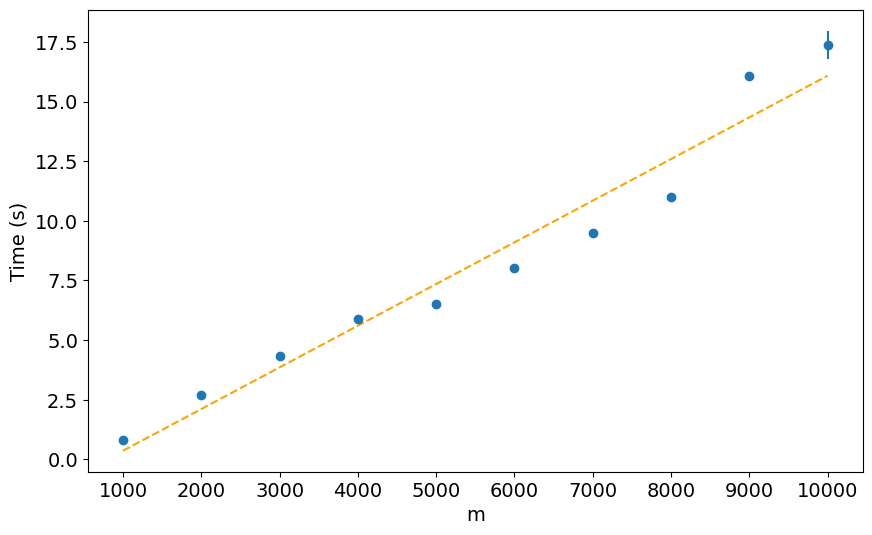

In [4]:
plot_time_mean_variance(n=512, trials=3, START=1000, END=10001, STEP=1000)

## Accuracy Analysis

Show that our implementatio holds the theoretical accuracy/stability analysis. We use an "a posteriori" test exploiting the residual:

$\frac{||X - QR||}{||X||}$

### Uniform X

In [5]:
a, b = -1, 1
num_matrices = 100
END = 5000
MAX_N = 256

n_values = [random.randint(1, MAX_N) for _ in range(num_matrices)]
dimensions = [(random.randint(n + 1, END), n) for n in n_values]
matrices = [np.random.uniform(a, b, size=(m, n)) for m, n in dimensions]

residuals = []

for matrix in matrices:
    residuals.append(residual_QR(matrix))

print(np.mean(residuals), np.var(residuals))


1.2657898583756538e-15 7.817864537600273e-32


### Normal X

In [6]:
loc, scale = 0, 1

n_values = [random.randint(1, MAX_N) for _ in range(num_matrices)]
dimensions = [(random.randint(n + 1, END), n) for n in n_values]
matrices = [np.random.normal(loc, scale, size=(m, n)) for m, n in dimensions]

residuals = []

for matrix in matrices:
    residuals.append(residual_QR(matrix))

print(np.mean(residuals), np.var(residuals))

1.2363673282776625e-15 7.334968042086044e-32


# Least-Square Problem (m $\geq$ n)

## Complexity Analysis

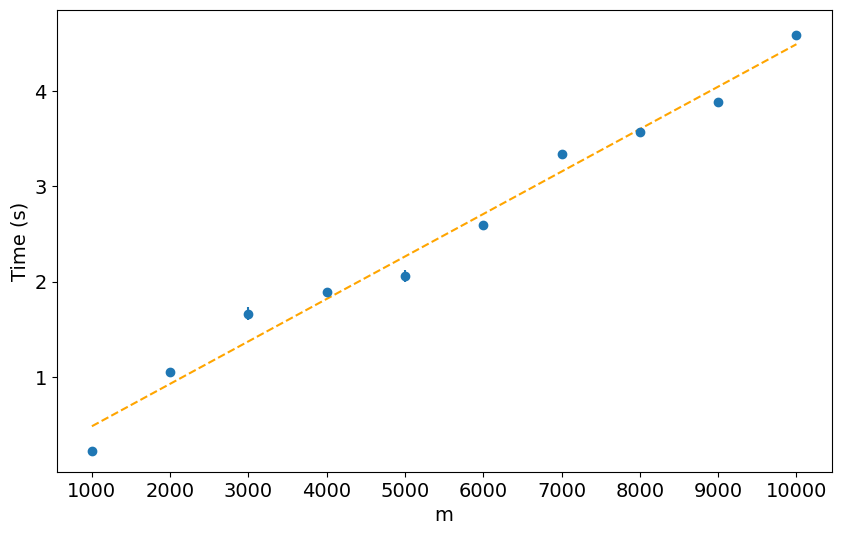

In [4]:
hidden_size = 256
input_size = 10
a, b = -1, 1
START=1000
END=10001
STEP=1000
num_trials = 3

mean_and_variance = []

for num_samples in range(START, END, STEP):
    times = []
    for _ in range(num_trials):
        D = np.random.uniform(a, b, size=(num_samples, input_size)) # dataset
        Y = np.apply_along_axis(lambda x: np.sum(np.sin(x) * np.cos(x)), axis=1, arr=D).reshape(-1, 1)

        model = ELM(input_size, hidden_size)
        start = time.time()
        model.fit(D, Y)
        end = time.time()
        times.append(end - start)
    mean_and_variance.append((np.mean(times), np.var(times)))

plot_errorbar(START, END, STEP, mean_and_variance)


In [ ]:
hidden_size = 512
input_size = 10
a, b = -1, 1
START=1000
END=10001
STEP=1000
num_trials = 3

mean_and_variance = []

for num_samples in range(START, END, STEP):
    times = []
    for _ in range(num_trials):
        D = np.random.uniform(a, b, size=(num_samples, input_size)) # dataset
        Y = np.apply_along_axis(lambda x: np.sum(np.sin(x) * np.cos(x)), axis=1, arr=D).reshape(-1, 1)

        model = ELM(input_size, hidden_size)
        start = time.time()
        model.fit(D, Y)
        end = time.time()
        times.append(end - start)
    mean_and_variance.append((np.mean(times), np.var(times)))

plot_errorbar(START, END, STEP, mean_and_variance)

## Accuracy Analysis

In [5]:
alfas = [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]
a, b = -1, 1
for ALFA in alfas:
    input_size, hidden_size = 10, 512
    num_samples = 1000

    D = np.random.uniform(a, b, size=(num_samples, input_size))
    y = np.apply_along_axis(lambda x: np.sum(np.sin(x) * np.cos(x)), axis=1, arr=D).reshape(-1, 1)

    model = ELM(input_size, hidden_size)
    model.fit(D, y, save_state=True)

    r = model.predict(D) - y
    X = model.X
    m, n = X.shape

    augmented_matrix = np.block([[ALFA * np.eye(m), X],
                                [X.T, np.zeros((n, n))]])


    upper_bound = np.linalg.cond(augmented_matrix, p=2) * (np.linalg.norm(1/ALFA * (X.T @ r)) / np.linalg.norm(y))
    print(f'ALFA: {ALFA}')
    print(f'Upper bound: {upper_bound}')
    print(f'Conditional number: {np.linalg.cond(augmented_matrix, p=2)}')

ALFA: 0.001
Upper bound: 1.8358677788589908e-05
Conditional number: 157035.60752113882
ALFA: 0.01
Upper bound: 1.5176566927288445e-07
Conditional number: 15819.07517219628
ALFA: 0.1
Upper bound: 1.064953340070923e-09
Conditional number: 1585.1420677222736
ALFA: 1
Upper bound: 2.0992841778875412e-10
Conditional number: 2233.476749163041
ALFA: 10
Upper bound: 2.634099007883958e-10
Conditional number: 14505.947169781182
ALFA: 100
Upper bound: 3.4689799003555026e-10
Conditional number: 231480.52044129005
ALFA: 1000
Upper bound: 1.4343153943161552e-09
Conditional number: 8501294.040178781


# Least-Square Problem (m < n)

## Complexity Analysis

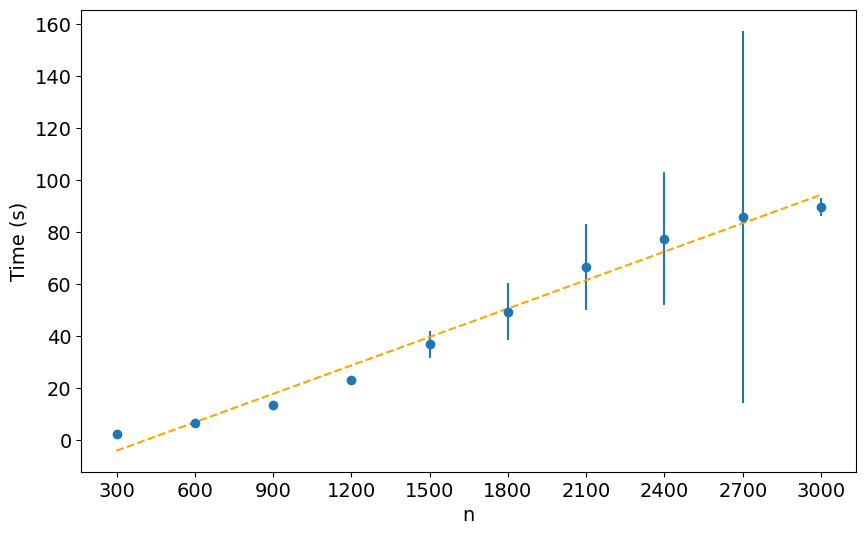

In [ ]:
num_samples = 256
input_size = 10
a, b = -1, 1
START=1000
END=10001
STEP=1000
num_trials = 3

mean_and_variance = []

for hidden_size in range(START, END, STEP):
    times = []
    for _ in range(num_trials):
        D = np.random.uniform(a, b, size=(num_samples, input_size)) # dataset
        Y = np.apply_along_axis(lambda x: np.sum(np.sin(x) * np.cos(x)), axis=1, arr=D).reshape(-1, 1)

        model = ELM(input_size, hidden_size)
        start = time.time()
        model.fit(D, Y)
        end = time.time()
        times.append(end - start)
    mean_and_variance.append((np.mean(times), np.var(times)))

plot_errorbar(START, END, STEP, mean_and_variance, xlabel='n')


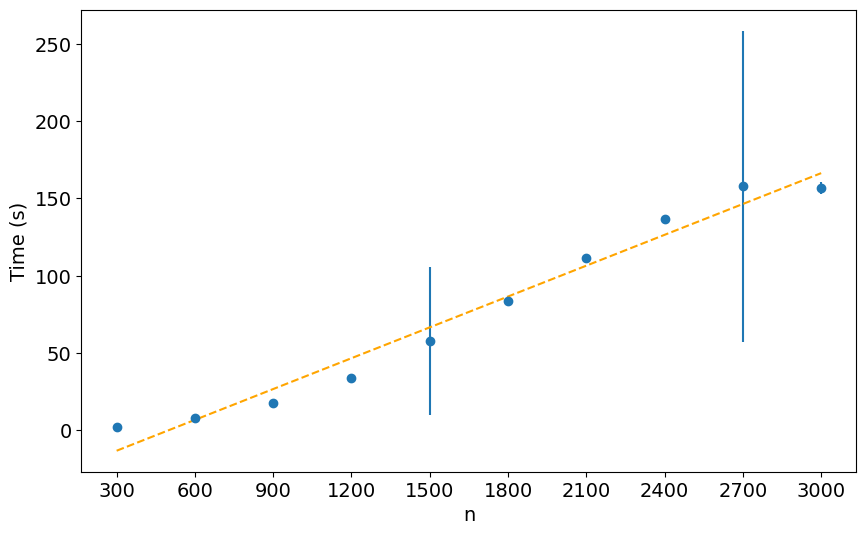

In [ ]:
num_samples = 512
input_size = 10
a, b = -1, 1
START=1000
END=10001
STEP=1000
num_trials = 3

mean_and_variance = []

for hidden_size in range(START, END, STEP):
    times = []
    for _ in range(num_trials):
        D = np.random.uniform(a, b, size=(num_samples, input_size)) # dataset
        Y = np.apply_along_axis(lambda x: np.sum(np.sin(x) * np.cos(x)), axis=1, arr=D).reshape(-1, 1)

        model = ELM(input_size, hidden_size)
        start = time.time()
        model.fit(D, Y)
        end = time.time()
        times.append(end - start)
    mean_and_variance.append((np.mean(times), np.var(times)))

plot_errorbar(START, END, STEP, mean_and_variance, xlabel='n')

## Accuracy Analysis

In [6]:
alfas = [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]
a, b = -1, 1
for ALFA in alfas:
    input_size, hidden_size = 10, 1000
    num_samples = 512

    D = np.random.uniform(a, b, size=(num_samples, input_size))
    y = np.apply_along_axis(lambda x: np.sum(np.sin(x) * np.cos(x)), axis=1, arr=D).reshape(-1, 1)

    model = ELM(input_size, hidden_size)
    model.fit(D, y, save_state=True)

    r = model.predict(D) - y
    X = model.X
    m, n = X.shape

    augmented_matrix = np.block([[ALFA * np.eye(n), X.T],
                                [X, np.zeros((m, m))]])


    upper_bound = np.linalg.cond(augmented_matrix, p=2) * (np.linalg.norm(1/ALFA * (X.T @ r)) / np.linalg.norm(y))
    print(f'ALFA: {ALFA}')
    print(f'Upper bound: {upper_bound}')
    print(f'Conditional number: {np.linalg.cond(augmented_matrix, p=2)}')

Short and wide
ALFA: 0.001
Upper bound: 1.5747349321315587e-05
Conditional number: 158584.4819768846
Short and wide
ALFA: 0.01
Upper bound: 2.0616305184786936e-07
Conditional number: 16341.667198294768
Short and wide
ALFA: 0.1
Upper bound: 1.4356761673239548e-09
Conditional number: 1584.028474623201
Short and wide
ALFA: 1
Upper bound: 1.9102375789029188e-10
Conditional number: 2137.4228943607586
Short and wide
ALFA: 10
Upper bound: 1.472937852509811e-10
Conditional number: 15036.082629908893
Short and wide
ALFA: 100
Upper bound: 1.3913224395632325e-10
Conditional number: 207362.44234129504
Short and wide
ALFA: 1000
Upper bound: 1.1137140621035835e-09
Conditional number: 7295733.271096971
